In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('result_by_coin.csv', index_col=[0, 1, 2])
df = df.rename_axis(('coin','regularization strength', 'date'))
df

insample  outOfSample         PnL  \
coin regularization strength date                                            
BTC  0.000                   2022-08-08  0.054459     0.036471  373.722943   
                             2022-08-09  0.055225     0.103440  237.338295   
                             2022-08-10  0.056549     0.075368  698.733556   
                             2022-08-11  0.061809     0.067999  291.448394   
                             2022-08-12  0.065166     0.068315  273.631751   
...                                           ...          ...         ...   
DOT  0.001                   2022-08-18  0.000000     0.000000    0.000000   
                             2022-08-19  0.000000     0.000000    0.000000   
                             2022-08-20  0.000000     0.000000    0.000000   
                             2022-08-21  0.000000     0.000000    0.000000   
                             2022-08-22  0.000000     0.000000    0.000000   

                                              PPN  
coin regularization strength date                  
BTC  0.000                   2022-08-08  0.000111  
                             2022-08-09  0.000081  
                             2022-08-10  0.000214  
                             2022-08-11  0.000097  
                             2022-08-12  0.000092  
...                                           ...  
DOT  0.001                   2022-08-18       NaN  
                             2022-08-19       NaN  
                             2022-08-20       NaN  
                             2022-08-21       NaN  
                             2022-08-22       NaN  

[1680 rows x 4 columns]

In [6]:
avg_r2 = df.groupby(level=[0, 1]).mean()
avg_r2


insample  outOfSample         PnL       PPN
coin regularization strength                                             
ADA  0.000000e+00             0.090812     0.108159  522.875644  0.000178
     1.000000e-07             0.090806     0.108314  526.625061  0.000179
     2.000000e-07             0.090805     0.108340  524.527334  0.000178
     5.000000e-07             0.090803     0.108452  527.490645  0.000178
     1.000000e-06             0.090804     0.108444  527.429593  0.000178
...                                ...          ...         ...       ...
XRP  5.000000e-05             0.048772     0.057782  269.258541  0.000083
     1.000000e-04             0.046971     0.059399  289.694308  0.000101
     2.000000e-04             0.043595     0.050045  264.663636  0.000092
     5.000000e-04             0.000000     0.000000    0.000000       NaN
     1.000000e-03             0.000000     0.000000    0.000000       NaN

[112 rows x 4 columns]

In [7]:
df.groupby(level=[0, 1]).mean().groupby(level=0).max()["PnL"]


coin
ADA     531.391027
BTC     392.696735
DOGE    717.043781
DOT     509.274370
ETH     524.886998
LTC     672.242095
SOL     510.389133
XRP     289.694308
Name: PnL, dtype: float64

In [8]:
df.groupby(level=[0, 1]).mean().groupby(level=0).max()["outOfSample"]


coin
ADA     0.110085
BTC     0.067860
DOGE    0.099168
DOT     0.062339
ETH     0.089892
LTC     0.060982
SOL     0.070781
XRP     0.059399
Name: outOfSample, dtype: float64

In [9]:
maxIdx = df.groupby(level=[0, 1]).mean().groupby(level=0).idxmax()["outOfSample"]


In [10]:
maxIdx

coin
ADA      (ADA, 0.0001)
BTC      (BTC, 0.0001)
DOGE    (DOGE, 0.0001)
DOT      (DOT, 0.0001)
ETH      (ETH, 0.0001)
LTC      (LTC, 0.0001)
SOL       (SOL, 2e-05)
XRP      (XRP, 0.0001)
Name: outOfSample, dtype: object

In [11]:
for coin in maxIdx.index:
    print(coin)

ADA
BTC
DOGE
DOT
ETH
LTC
SOL
XRP


/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/285369102.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["outOfSample"], label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/285369102.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["outOfSample"], label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/285369102.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["outOfSample"], label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/285369102.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["outOfSample"], label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/285369102.py:3: PerformanceWarning: indexing past lexsort depth may impact performa

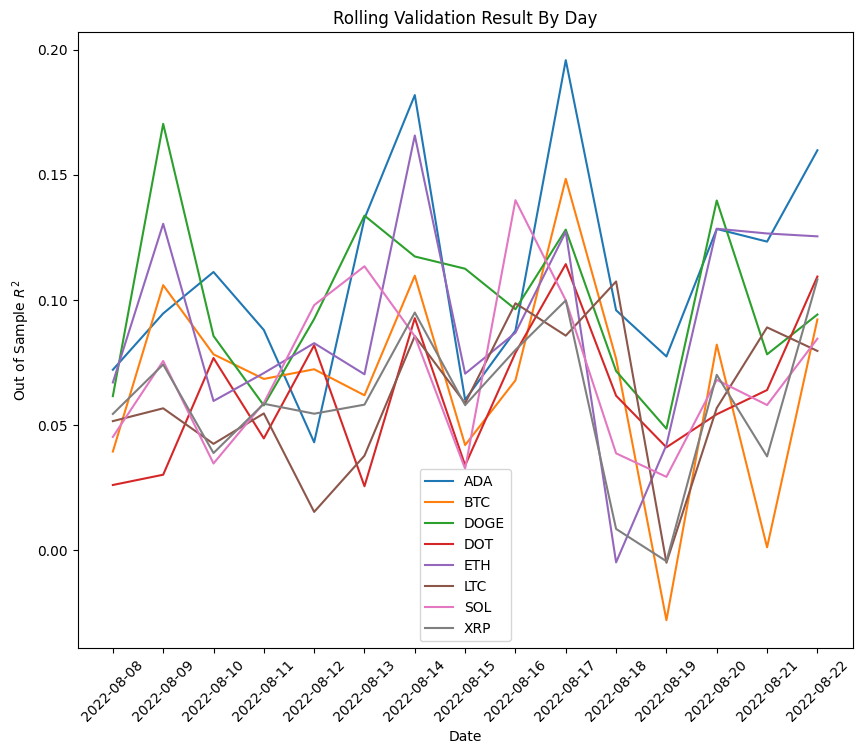

In [12]:
plt.figure(figsize=(10, 8))
for coin in maxIdx.index:
    plt.plot(df.loc[maxIdx[coin]]["outOfSample"], label=coin)

plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Out of Sample $R^2$")
plt.title("Rolling Validation Result By Day")
plt.show()

/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/4258623671.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["PnL"].cumsum(), label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/4258623671.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["PnL"].cumsum(), label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/4258623671.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["PnL"].cumsum(), label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/4258623671.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(df.loc[maxIdx[coin]]["PnL"].cumsum(), label=coin)
/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/4258623671.py:3: PerformanceWarning: indexing past lexsort depth may impact

Text(0.5, 1.0, 'Accumulated PnL By Day (Assume \\$10000 Notional Per Trade)')

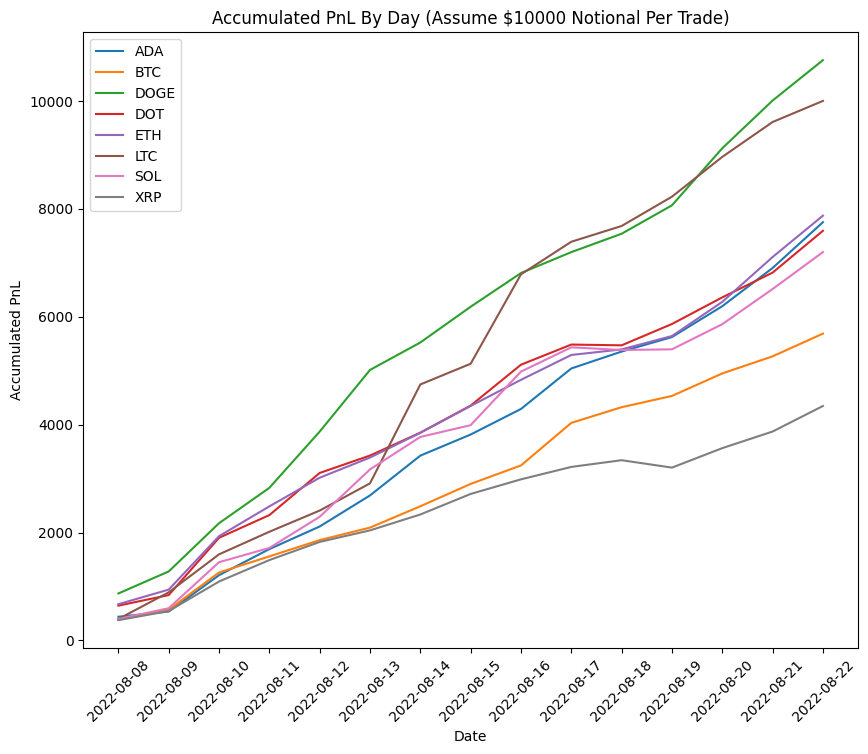

In [13]:
plt.figure(figsize=(10, 8))
for coin in maxIdx.index:
    plt.plot(df.loc[maxIdx[coin]]["PnL"].cumsum(), label=coin)

plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Accumulated PnL")
plt.title("Accumulated PnL By Day (Assume \$10000 Notional Per Trade)")


In [14]:
sharpes = df.groupby(level=[0, 1]).apply(lambda df: df["PnL"].mean() / df["PnL"].std())[maxIdx]
sharpes.name = "sharpe"
sharpes.index.name = ("coin", "best regularization strength")

/var/folders/h1/tr1q_6210b3fh7z5w19c2qvm0000gp/T/ipykernel_74506/2739566625.py:1: RuntimeWarning: invalid value encountered in double_scalars
  sharpes = df.groupby(level=[0, 1]).apply(lambda df: df["PnL"].mean() / df["PnL"].std())[maxIdx]


In [15]:
sharpes


coin  regularization strength
ADA   0.00010                    2.504141
BTC   0.00010                    2.282593
DOGE  0.00010                    2.784844
DOT   0.00010                    1.907831
ETH   0.00010                    2.258224
LTC   0.00010                    1.457561
SOL   0.00002                    1.541100
XRP   0.00010                    1.785257
Name: sharpe, dtype: float64